#Pyber Ride Analysis:

    1. Urban areas trend the most drivers, riders, and fares.
    2. Rural areas trend the highest fares, likely due to increased distances from point A to B.
    3. While Urban areas trend the highest demand (Total Rides), due to the surplus of driv

In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Read the City and Ride Data
# Combine the data into a single dataset
# Display the data table for preview
cd = pd.read_csv("data/city_data.csv")
rd = pd.read_csv("data/ride_data.csv")
rd.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [14]:
#Validate ride data
rgrp = rd.groupby(["city"]+["date"]+["fare"]+["ride_id"])
a = int(len(rgrp))
b = int(len(rd))

if a == b:
    print("no need to consolidate ride data")
else:
    rd = rd.drop_duplicates()

#Validate city data
c = cd["city"].nunique()
d = cd["city"].count()
    
if c == d:
    print("no need to consolidate city data")
    
else:
    cgrp = cd.grouby(["city"]+["type"])
    cd = cgrp["driver_count"].sum()
    cd = cd.reset_index()
    e = cd["city"].count()
    print("city data consolidated from "+str(d)+" to " +str(e))

no need to consolidate ride data
no need to consolidate city data


In [15]:
#Merge
city_ride = pd.merge(rd,cd,how='left',on='city')
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [16]:
# Obtain the x and y coordinates for each of the three city types
group_cityride = city_ride.groupby(["city"]+["type"]+["driver_count"])

avg_fare = group_cityride["fare"].mean()

ride_total = group_cityride["ride_id"].count()

df = pd.DataFrame({"AverageFare": avg_fare, "TotalRides": ride_total})
df = df.reset_index()
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure


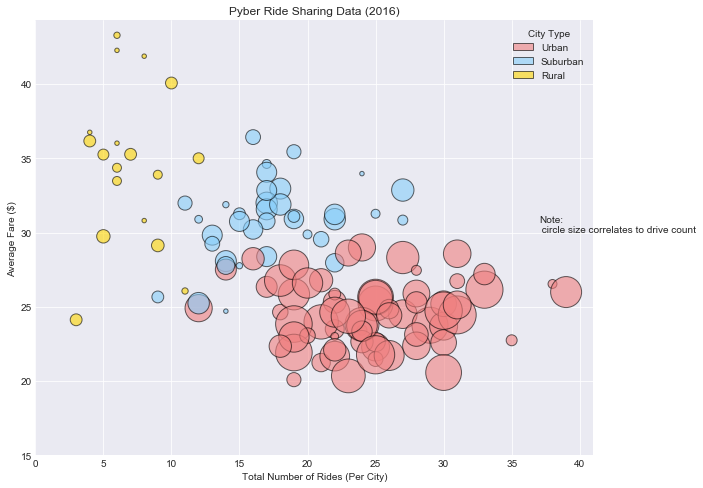

In [19]:
#scatter function
colors = {"Urban": "lightcoral", "Suburban": "lightskyblue", "Rural": "gold"}

#update legend
import matplotlib.patches as mpatches

U = mpatches.Circle((0.5, 0.5),0.1, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=1)
S = mpatches.Circle((0.5, 0.5),0.1, facecolor="lightskyblue",alpha=.6,edgecolor="black",linewidth=1)
R = mpatches.Circle((0.5, 0.5),0.1, facecolor="gold",alpha=.6,edgecolor="black",linewidth=1)

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df["TotalRides"], df["AverageFare"], s=df["driver_count"]*20, c=df["type"].apply(
    lambda x:colors[x]),alpha=.6,linewidth=1, edgecolor="black" )
ax.legend([U,S,R], ["Urban", "Suburban", "Rural"], title= "City Type")

#limits
ax.set_xlim(0, max(df["TotalRides"])+2)
ax.set_ylim(15, max(df["AverageFare"])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data (2016)")
ax.text(37,30, 'Note:\n circle size correlates to drive count')

plt.show()

## Total Fares by City Type

In [21]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure
# calculate variables that will be used in the Pie Chart
gtype = city_ride.groupby(['type'])
ggtype = city_ride.groupby(['type'])

# Calculate Total fare($) Per CityType
total_fare = gtype['fare'].sum()

# Calculate Total Rides Per CityType
total_rides = gtype['ride_id'].count()

# Calculate Total Drivers Per CityType
total_drivers = ggtype['driver_count'].sum()

df1 = pd.DataFrame({"TotalFare":total_fare, "TotalRides":total_rides, "TotalDrivers":total_drivers})
df1 = df1.reset_index()
df1

,type,TotalFare,TotalRides,TotalDrivers
0,Rural,4327.93,125,537
1,Suburban,19356.33,625,8570
2,Urban,39854.38,1625,59602


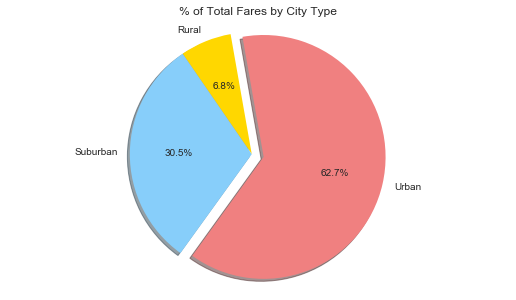

In [30]:
#Chart
labels = df1['type']
sizes = df1['TotalFare']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")

plt.title("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

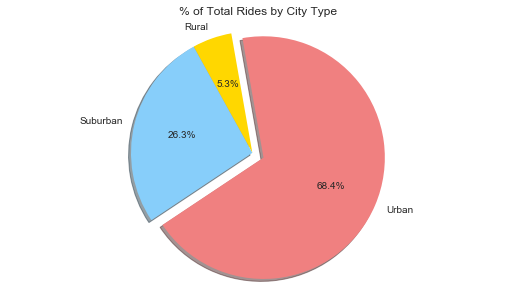

In [29]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure
labels = df1['type']
sizes = df1['TotalRides']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=100)
            
plt.title("% of Total Rides by City Type")
plt.axis("equal")
plt.show()

## Total Drivers by City Type

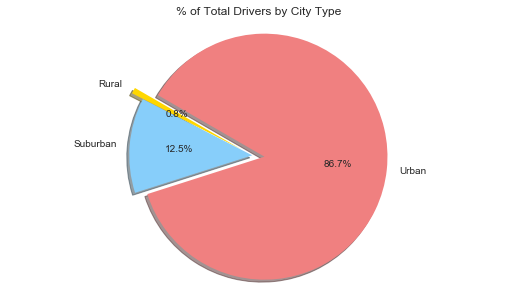

In [28]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure
labels = df1['type']
sizes = df1['TotalDrivers']
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.1, 0, 0.1)

plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=150)
            
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.show()